## Ito's Lemma
### Ito's Lemma - 1-D version

**Theorem:** 
Let $X_t \in {\mathbb R}$ solve the SDE
$$
d X_t = 
a(X_t,t) \, dt + b(X_t,t) \, dW_t
$$
with initial condition $X_0$. 

Suppose that $f:{\mathbb R} \to {\mathbb R}$ is smooth, then $(f(X),X_t) \in {\mathbb R}^2$ solves
$$
\begin{split}
d (f({X}_t)) &= 
\left( f^\prime(X_t) a({X}_t,t)
+ \frac{1}{2} f^{\prime \prime}(X_t) b(X_t,t)^2 \right) \, dt + f^\prime(X_t) b(X_t,t) \, dW_t \longrightarrow (f (x)\text{ obeys this SDE})\\
d X_t &= 
a(X_t,t) \, dt + b( X_t,t) \, dW_t
\end{split}
$$
with initial condition $(f(X_0),X_0)$.

### Example

Use Ito's Lemma to prove that if $Z_t$ satisfies
$$
d Z_t = (\mu - \frac{1}{2}\sigma^2)\, d t + \sigma \, d W_t
$$
for constants $\mu$ and $\sigma$ then if we define $S_t=\exp(Z_t)$ we will have
$$
d S_t = S_t(\mu \, dt + \sigma \, d W_t ).
$$

Deduce that the solution of
$$
d S_t = S_t(\mu \, dt + \sigma \, d W_t ).
$$
given $S_0$ is given by
$$
S_t = S_0 e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma W_t}
$$

Taking $f(z)=\exp(z)$. Plugging this into Ito's Lemma

$$
\begin{split}
d f(Z)_t &= f^\prime(Z_t) (\mu-\tfrac{1}{2}\sigma^2) \, dt + \tfrac{1}{2} f^{\prime\prime}(Z_t) \sigma^2 \, dt + f^{\prime}(Z_t) \sigma \, dW_t \\
&= \exp(z) (\mu \, dt + \sigma \, dW_t) \\
&= f(Z_t) (\mu \, dt + \sigma \, dW_t)
\end{split}
$$

hence with $S_t = f(Z_t)$

$$
\begin{split}
d S_t &= S_t (\mu \, dt + \sigma \, dW_t)
\end{split}
$$

But $Z_t=Z_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t$ by solving the SDE for $Z_t$ (following solution to constant coefficient SDEs in Stochastic Differential Equations.ipynb file).
Hence $Z_t=\log(S_0) + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t$ and so
$$
S_t=S_0 e^{ (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t}
$$


### Ito's Lemma - full version
Just as the chain rule has higher-dimensional versions, so does Ito's lemma. 

Let $({\mathbf X})_t \in {\mathbb R}^n$ be an $n$-dimensional stochastic process.
Write $X^i_t$ for the $i$-th component of ${\mathbf X}_t$. $1 \leq i \leq n$.

Let $({\mathbf W})_t \in {\mathbb R}^d$ be a $d$-dimensional Wiener process. Write
$W^\alpha_t$ for the $\alpha$-th component of ${\mathbf X}_t$. $1 \leq \alpha \leq d$.

Let ${\mathbf a}:{\mathbb R}^n \times {\mathbb R} \to {\mathbb R}^n$ be a
smooth function. Write $a_i$ for the $i$-th component of $a$. ${\mathbf a}$ is a vector
valued function.

Let $b:{\mathbb R}^n \times {\mathbb R} \to {\mathbb R}^n \times {\mathbb R}^d$ be a
smooth function. Write $b_{i\alpha}$ for the components of $b$ where $1 \leq i \leq n$
and $1 \leq \alpha \leq d$. $b$ is a matrix valued function.

Let $f:{\mathbb R}^n \times {\mathbb R} \to {\mathbb R}^k$ be a smooth function. We write $f(x_1,\ldots, x_n,t)$
to indicate the dependence of $f$ on its components and write $f^I$
for the components of $f$, $1 \leq I \leq k$.

**Theorem:**
Suppose that ${{\mathbf X}}_t$ satisfies the equations
$$
d X^i_t = a_i({\mathbf X}_t,t) dt + \sum_{\alpha=1}^d b_{i\alpha}({\mathbf X}_t,t) d W_t^\alpha
$$
then $f^I({\mathbf X})_t, t)$ satisfies
$$
\begin{split}
d f^I({\mathbf X}_t,t)
&= \left( \frac{ \partial f^I}{\partial t}
+ 
\sum_{i=1}^n 
\frac{ \partial f^I}{\partial x_i}
a_i({\mathbf X}_t,t)
+
\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \sum_{\alpha=1}^d
\frac{ \partial^2 f^I}{\partial x_i \partial x_j} b_{i\alpha} b_{j\alpha}
\right) dt \\
& \qquad +
\sum_{i=1}^n 
\sum_{\alpha=1}^d b_{i\alpha}({\mathbf X}_t,t) d W_t^\alpha
\frac{ \partial f^I}{\partial x_i}
\end{split}
$$

Lets use Symbolic Python (sympy) to evaluate the mathematical calculations.

In [1]:
import sympy as sp

x, y = sp.symbols(['x','y'])  # Set x and y as maths symbols.
print(sp.expand((x+y)**2) == x**2 + 2*x*y + y**2)
print(sp.simplify(x**2 + 2*x*y + y**2))

True
x**2 + 2*x*y + y**2


In [2]:
sp.diff( sp.atan(x), x)  # Symbolic differentiation of arctan(x).

1/(x**2 + 1)

In [3]:
sp.integrate( 1/(1+x**2), x)  # Symbolic integration.

atan(x)

Lets compute the following partial derivatives using sympy:
$$\frac{\partial^2}{\partial u \, \partial v} e^{\sin(u)\cos(v)}$$

In [4]:
u, v = sp.symbols('u v')
sp.diff( sp.exp(sp.sin(u)*sp.cos(v)), u, v )

-(sin(u)*cos(v) + 1)*exp(sin(u)*cos(v))*sin(v)*cos(u)

Integrate:
$$
\int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi}} u^4 e^{-\frac{u^2}{2}} \, d u.
$$

In [5]:
sp.integrate(1/sp.sqrt(2*sp.pi)*u**4*sp.exp(-u**2/2), (u,-sp.oo,sp.oo))

3

### Matrices

Sympy has its own functions for working with matrices.

In [6]:
sp.zeros(4) + sp.eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

### Applying Ito's Lemma using Sympy
We can now take all the sums in Ito's lemma and turn them into code using for
loops. We can perform all the differentiation needed using the `diff` function.

The function `apply_itos_lemma` does this calculation. It takes as input

* A vector containing the names used for the variables on ${\mathbb R}^n$
* Vectors and matrices representing the coefficients $a$ and $b$
* A vector containing the formula for $f$.
It computes the resulting
coefficients of $dt$ and the noise $dW_t$. These will be an $k$-vector and a $(k \times d)$-matrix
respectively.

In [7]:
def apply_itos_lemma( x, a, b, f):
    n = len(a)
    d = b.shape[1]
    k = len(f)
    c_dt = sp.zeros(k,1)  # k rows, 1 column.
    c_dW = sp.zeros(k,d)  # kxd Matrix.
    
    for I in range(0,k):
        for i in range(0,n):
            c_dt[I] = c_dt[I] + sp.diff(f[I],x[i])*a[i]
        for i in range(0,n):
            for j in range(0,n):
                for alpha in range(0,d):
                    c_dt[I] = c_dt[I] + sp.diff(f[I],x[i], x[j])*b[i,alpha]*b[j,alpha]/2
        for i in range(0,n):
            for alpha in range(0,d):                  
                c_dW[I,alpha] = c_dW[I,alpha] + sp.diff(f[I],x[i])*b[i,alpha]
                
    return c_dt, c_dW  # Coefficients of dt(k vector) and dWt(kxd Matrix).

### Example - Brownian motion on a circle

* Take $n=2$ (so we have a 2-d solution space), $d=1$ and $k=2$.
* Take $a=(0,0)$, $b=(0,1)$
* Define $f(x_1,x_2)=(x_1 \cos( x_2 ), x_1 sin( x_2))$

So our original SDE is simply
$$
\begin{split}
(d X^1)_t &= 0 \\
(d X^2)_t &= d W_t.
\end{split}
$$

What is the SDE satisfied by $f(X_1,X_2)?$

In [8]:
# Represent f and the coefficients symbolically.
x1,x2 = sp.symbols(['x1','x2'])

x = sp.Matrix([x1,x2])
a = sp.Matrix([0,0])
b = sp.Matrix([[0],[1]])
f = sp.Matrix([x1 * sp.cos(x2), x1 * sp.sin(x2)])

# Applying Ito's lemma.
c_dt, c_dW = apply_itos_lemma(x,a,b,f)
c_dt

Matrix([
[-x1*cos(x2)/2],
[-x1*sin(x2)/2]])

In [9]:
c_dW

Matrix([
[-x1*sin(x2)],
[ x1*cos(x2)]])

Lets write this in terms of the coefficients of $f_1$ and $f_2$ using the `subs` function in sympy.
If you call `subs(x,y)` on a symbolic expression like c_dt, it will replace all instances of the expression
`x` with the expression `y`.

In [10]:
f1,f2 = sp.symbols(['f1','f2'])
c_dt = c_dt.subs([(f[0], f1),(f[1],f2)]);
c_dW = c_dW.subs([(f[0], f1),(f[1],f2)]);

In [11]:
c_dt

Matrix([
[-f1/2],
[-f2/2]])

In [12]:
c_dW

Matrix([
[-f2],
[ f1]])

So the SDE satisfied by $f(X_1,X_2)$ is 
$$
\begin{split}
d f^1_t &= -\frac{1}{2} f^1_t \, dt - f^2_t \, d W_t \\
d f^1_t &= -\frac{1}{2} f^2_t \, dt + f^1_t \, d W_t \\
\end{split}
$$

To test this we notice that the solution to our original SDE with initial
condition is simply:
$$
\begin{split}
X^1_t &= X^1_0 \\
X^2_t &= X^2_0 + W_t
\end{split}
$$
so we expect the solution of our new equations to be
$$
\begin{split}
f^1_t &= X^1_0 \cos( X^2_0 + W_t ) \\
f^2_t &= X^1_0 \sin( X^2_0 + W_t ).
\end{split}$$
So the solution to the equations for $f^1_t$ and $f^2_t$ should move in a circle
centred on the origin of radius $X^1_0$.

### Example
Using `Ito's lemma` show that if 
$$
d S_t = S_t( \mu dt + \sigma dW_t)
$$
then this implies
$$
d \log(S)_t = (\mu - \frac{1}{2}\sigma^2) dt + \sigma dW_t.
$$

In [13]:
S, mu, sigma = sp.symbols(['S','mu','sigma'])
S_vec = sp.Matrix([S])
a = sp.Matrix([S*mu])
b = sp.Matrix([S*sigma])
f = sp.Matrix([sp.log(S)])

c_dt, c_dW = apply_itos_lemma(S_vec,a,b,f)
assert( c_dt==sp.Matrix([mu-sigma**2/2]))
assert( c_dW==sp.Matrix([sigma]) )

In [14]:
print(c_dt,'dt','+',c_dW,'dWt')

Matrix([[mu - sigma**2/2]]) dt + Matrix([[sigma]]) dWt


## Example

Lets write a function `euler_maruyama` that takes as parameters the initial condition $X_0$, the coefficient functions $a$ and $b$ and
vectors `W`, `times` containing the noise process and the time and returns a vector containing all the corresponding values of $X$
if one applies the Euler Maruyama scheme to the equation
$$
d X_t = a(X_t,t) \, d t + b(X_t,t) \, d W_t.
$$

In [15]:
import numpy as np
import mathfinance as mf

def euler_maruyama(X0,a,b,W,times):
    X = np.zeros(len(W))
    X[0] = X0
    for i in range(0,len(times)-1):
        t = times[i]
        dt = times[i+1]-times[i]
        dW = W[i+1]-W[i]
        X[i+1]=X[i] + a(X[i],t)*dt + b(X[i],t)*dW
    return X

# Test with geometric Brownian motion.
np.random.seed(0)
T = 1
W, times = mf.one_step_wiener(T)
W,times = mf.wiener_interpolate(W,times,20)

mu = 0.5
sigma = 1
def a_gbm(S,t):
    return mu*S
def b_gbm(S,t):
    return sigma*S

WT = W[-1]
S0 = 100
S = euler_maruyama(S0,a_gbm,b_gbm,W,times);
expectedST = S0*np.exp((mu- 0.5*sigma**2)*T + sigma*WT)
ST = S[-1]
assert abs(expectedST - ST)<0.1 ;

### Example
Let ${\mathbf S}_t \in {\mathbb R}^n$ is an $n$-dimensional process
following continuous time geometric Brownian motion
$$
d {\mathbf S}_t = {\mathbf S}_t \circ ( {\mathbf \mu} dt + \sigma d{\mathbf W}_t ).
$$
where $\mu$ is an $n$-vector, $\sigma$ is an $n\times n$ matrix, ${\mathbf W}_t$ is an $n$-dimensional Wiener process and $\circ$ denotes elementwise multiplication.

Write this equation out in terms of the components $S^i_t$,
$\mu_i$, $\sigma_{i\alpha}$,
and $W^\alpha_t$ ($1 \leq i \leq n$, $1 \leq \alpha \leq n$).

Write $Z^i_t = \log (S^i_t)$.

Use Ito's lemma to compute the SDE satisfied by $Z^i_t$. We should find that it is an $n$-dimensional Brownian
motion.

Suppose that we wanted to simulate ${\mathbf S}_T$ at some final time $T$ but we were not
interested in the values of ${\mathbf S}_t$ at intermediate times, how can we do this?

### Solution
$$ S^i_t = S^i_t \mu^i \, dt + \sum_{\alpha=1}^n \sigma_{i \alpha} d W^\alpha_t$$

Define a vector valued function $f({\mathbf S})$ with components $f({\mathbf S})^i = \log(S^i)$.
$$
\frac{\partial f^i}{\partial S^j} = \begin{cases}
\frac{1}{S_i} & i=j \\
0 & \text{otherwise}
\end{cases}k\frac{\partial f^i}{\partial S^j} 
$$

$$
\frac{\partial^2 f^i}{\partial S^j \partial S^k} = \begin{cases}
-\frac{1}{S_i^2} & i=j=k \\
0 & \text{otherwise}
\end{cases}
$$

So by the multidimensional Ito's Lemma

$$
\begin{split}
d f({\mathbf S})^i_t &= \sum_{j=1}^n \frac{\partial f^i}{\partial S^j}  S^j_t \mu_j \, dt \\
&\quad + \frac{1}{2} \sum_{j=1}^n \sum_{k=1}^n \sum_{\alpha=1}^n \sigma_{j \alpha} \sigma_{k \alpha} \frac{\partial^2 f^i}{\partial S^j \partial S^k} \, dt \\
&\quad + \sum_{j=1}^n \sum_{\alpha=1}^n \frac{\partial f^i}{\partial S^j}  \sigma_{j \alpha} S^j_t d W^\alpha_t \\
&= \frac{1}{S^i_t}  S^i_t \mu_i \, dt \\
&\quad + \frac{1}{2} \sum_{\alpha=1}^n \sigma_{i \alpha} \sigma_{i \alpha} \frac{-1}{(S^i_t)^2} \, dt \\
&\quad + \sum_{j=1}^n \sum_{\alpha=1}^n \frac{1}{S^i_t}  \sigma_{i \alpha} S^i_t d W^\alpha_t  \\
&= (\mu_i - \sum_{\alpha=1}^n \sigma_{i \alpha}^2) dt + \sum_{\alpha=1}^n \sigma_{i \alpha} d W^\alpha_t 
\end{split}
$$

This is a constant coefficient SDE, so we may write down:
$$\log( S)_t = \log(S)_0 + (\mu_i - \sum_{\alpha=1}^n \sigma_{i \alpha}^2) t + \sum_{\alpha=1}^n \sigma_{i \alpha} W^\alpha_t.$$
Hence
$$S^i_t = S_0 \exp\left( \mu_i - \sum_{\alpha=1}^n \sigma_{i \alpha}^2) t + \sum_{\alpha=1}^n \sigma_{i \alpha} W^\alpha_t \right).$$

We have solved the SDE explicitly. To simulate stock prices at time $T$, we need only simulate ${\mathbf W}$ at the final time $T$, which
we may do be simulating a multivariate normal distribution with mean $0$ and covariance matrix $T {\mathbf 1}_n$. 

## Exercise

One way to model the price of a single stock is to use the geometric Brownian motion model
$$
d S_t = S_t( \mu dt + \sigma d W_t ).
$$
Devise your own model for a stock price $S_t$ where the *volatility* term $\sigma$ is itself stochastic.
There is no single right answer to this question, you are being asked to create your own model.

Using your model, simulate the stock price at the final time $S_T$ and plot a histogram of the result. You
should also plot a histogram of $Z_T:=\log S_T$.

Generate a Q-Q plot to see if $Z_T$ is normally distributed in your model.

A Q-Q plot shows the quantiles
of one distribution against another. If they are the same distribution, you will get a line
at 45 degrees. So these plots can be used to test if a random variable has a given distribution.
Here is a process for generating a Q-Q plot to see if $Z_T$ is normally distributed:

* Generate $N$ samples of $Z_T$ and store them in a vector `Z`
* Sort the vector `Z`
* Divide the interval $[0,1]$ into $N$ intervals and let the vector `U` contain the midpoints of each interval in order. `U` will have length $N$.
* Create a vector `N` by applying the inverse distribution function of the normal distribution
to `U`
* Plot `N` against the sorted vector `Z`.

If $Z_T$ is normally distributed, the resulting plot will be approximately a straight line.

### Solution

The simplest model I can think of has $\sigma_t$ simply following a Geometric Brownian motion
$$
\begin{split}
d \sigma_t &= c \sigma_t \, dW^1_t \\
d S_t &= S_t(\mu \, dt + \sigma_t \, dW^2_t).
\end{split}
$$
For simplicity I'd assume $W^1_t$ and $W^2_t$ are independent. The reason I have decided against Brownian motion
as a model for $\sigma_t$ is to avoid the stock every becoming riskless even for a moment.

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

c = 0.3
mu = 0.08
sigma0 = 0.2
S0 = 100
T = 1

n_simulations = 10000
n_steps = 100
dt = T/n_steps
sigma = np.zeros((n_simulations,n_steps+1))
S = np.zeros((n_simulations,n_steps+1))
S[:,0] = S0
sigma[:,0] = sigma0
t = np.linspace(0,T,n_steps+1)
for i in range(0,n_steps):
    eps1 = np.random.randn(n_simulations)
    eps2 = np.random.randn(n_simulations)
    sigma[:,i+1]=sigma[:,i] + c *sigma[:,i] *np.sqrt(dt)*eps1
    S[:,i+1]=S[:,i] + S[:,i]*(mu*dt + sigma[:,i]*np.sqrt(dt)*eps2)

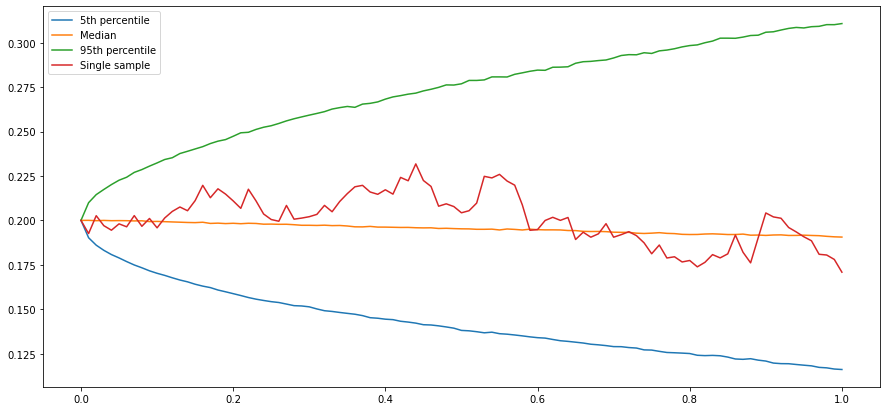

In [18]:
def fan_diagram( X, t, title ):
    lower = np.percentile(X,5, axis=0)
    median = np.percentile(X,50, axis=0)
    upper = np.percentile(X,95, axis=0)
    plt.plot(t, lower, label='5th percentile' )
    plt.plot(t, median, label='Median' )
    plt.plot(t, upper, label='95th percentile' )
    plt.plot(t, X[0,:], label='Single sample')
    plt.legend()

fan_diagram( sigma, t, 'Simulated Volatility $\sigma_t$')

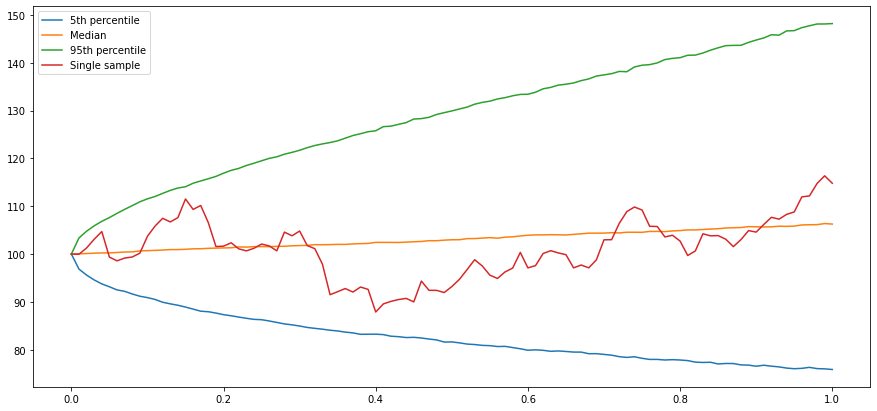

In [19]:
fan_diagram( S, t, 'Simulated Stock Price $S_t$')

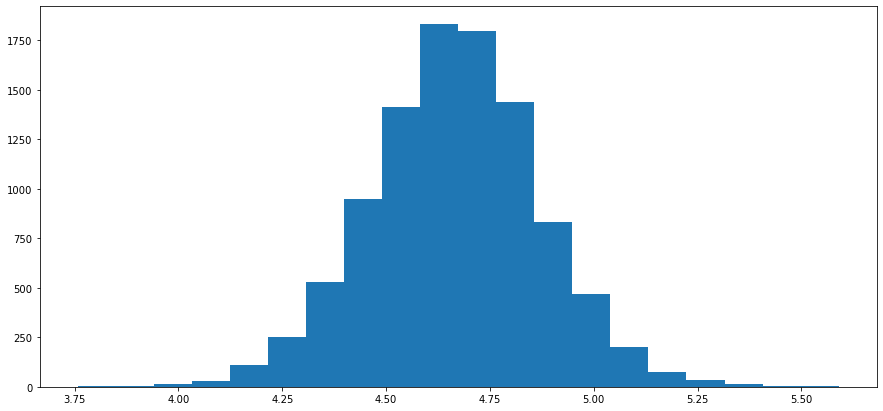

In [20]:
Z = np.log(S)
final_Z = plt.hist(Z[:,-1], bins=20);

Text(0, 0.5, 'Model percentiles')

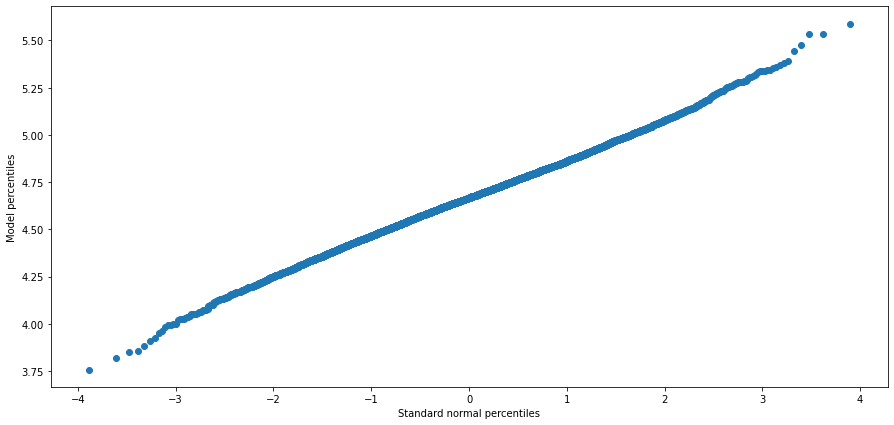

In [21]:
import scipy.stats

midpoints = np.arange(1/(2*n_simulations),1,1/n_simulations)
U = scipy.stats.norm.ppf( midpoints )
V = np.sort( Z[:,-1])
plt.scatter(U,V)
plt.xlabel('Standard normal percentiles')
plt.ylabel('Model percentiles')